<a href="https://colab.research.google.com/github/DaphiFluffi/Yolov3-To-Onnx-Unity/blob/main/Weights_Pb_FrozenPB_Onnx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This worked! Converting trained .weights to .onnx that will actually import into Unity 2019.4.8f1
https://github.com/derenlei/Unity_Detection2AR/issues/16#issuecomment-786339303


Versions:
*   Python 3.6.0
*   Tensorflow 1.4.0

Google Colab defaults to:
*   Python 3.7
*   Tensorflow 2








In [ ]:
# install python 3.6
# on a computer you dont need this, just install python 3.6 and add it to PATH
# all other google colab preinstalled programs get lost after this
# DO THIS PART ON YOUR LOCAL PC
"""%%bash

MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX"""

In [3]:
"""import sys
_ = (sys.path.append("/usr/local/lib/python3.6/site-packages"))"""

In [ ]:
"""!python --version"""

**1. Convert Darknet (.cfg and .weights) to (.pb and .ckpt)** \
**DO THE DW2TF PART ON YOUR LOCAL PC!** It does not really work in Colab because you can't propertly change the Python version to 3.6 and there are known issues with 3.7

In [ ]:
!git clone https://github.com/jinyu121/DW2TF

In [ ]:
%cd /content/DW2TF

put .cfg und your own trained/backuped .weights files into in /content/DW2TF/data

In [ ]:
!python main.py \
    --cfg 'data/yolov3-tiny.cfg' \
    --weights 'data/yolov3-tiny.weights' \
    --output 'data/' \
    --prefix 'yolov3-tiny/' \
    --gpu 0

Result: 
*  yolov3-tiny.pb 
*  yolov3-tiny.ckpt.meta
*  yolov3-tiny.ckpt.index
*  yolov3-tiny.ckpt.data-00000-of-00001
*  checkpoint

in data folder

Full SVG image of yolov3-tiny.pb: `yolov3-tiny.pb.svg`

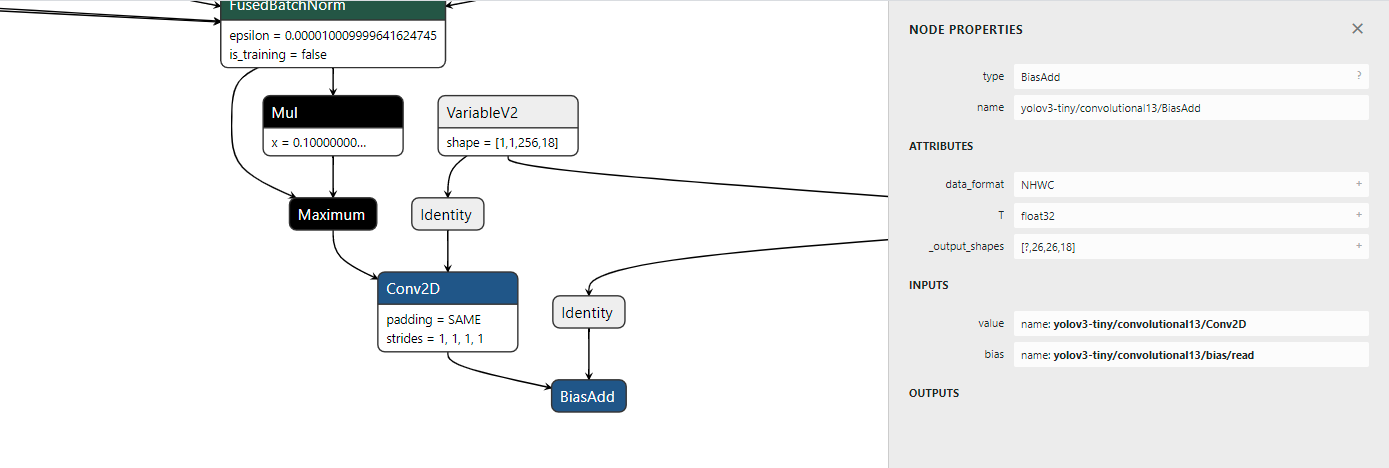

**2.Freeze the converted tensorflow graph** \
should work in colab, but use tensorflow 1 not 2

In [ ]:
# set Google Colab to Tensorflow 1. 
# do this at the beginning, because it needs to reset the entire Colab runtime and thus deletes all your files
%tensorflow_version 1.4


name of the bottom-most node is `yolov3-tiny/convolutional13/BiasAdd`
find out the name by uploading the `yolov3-tiny.pb` file to https://netron.app/ and scrolling down 

put all the result files in a new `result folder`

In [ ]:
!python -m tensorflow.python.tools.freeze_graph \
      --input_graph=./result/yolov3-tiny.pb \
      --input_binary=true --output_node_names=yolov3-tiny/convolutional13/BiasAdd \
      --input_checkpoint=./result/yolov3-tiny.ckpt \
      --output_graph=./result/my-yolov3-tiny-freeze.pb

Full SVG image of my-yolov3-tiny-freeze.pb: `my-yolov3-tiny-freeze.pb.svg`

**3.Convert the frozen tensorflow graph to onnx format**

In [ ]:
!pip install -U tf2onnx

find out Input node name (net1:0 in my case) by looking at the frozen graph in netron and clicking the top-most node

In [ ]:
!python -m tf2onnx.convert \
        --graphdef ./result/my-yolov3-tiny-freeze.pb \
        --output pillbox-from-frozen-graph-thing.onnx \
        --inputs yolov3-tiny/net1:0 \
        --outputs yolov3-tiny/convolutional13/BiasAdd:0

Full SVG image of pillbox-from-frozen-graph-thing.onnx: `pillbox-from-frozen-graph-thing.onnx.svg`

In [4]:
my output after tf2onnx.convert:

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))

2021-05-17 12:01:35,879 - WARNING - From /usr/local/lib/python3.7/dist-packages/tf2onnx/verbose_logging.py:76: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.

2021-05-17 12:01:36.000860: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-05-17 12:01:36,767 - INFO - Using tensorflow=1.15.2, onnx=1.9.0, tf2onnx=1.8.5/50049d
2021-05-17 12:01:36,768 - INFO - Using opset <onnx, 9>
2021-05-17 12:01:37,624 - INFO - Computed 0 values for constant folding
2021-05-17 12:01:40,255 - INFO - Optimizing ONNX model
2021-05-17 12:01:40,567 - INFO - After optimization: BatchNormalization -10 (10->0), Const -32 (55->23), Iden

# Failed Attempts:

## Versuch Umwandeln von .weights in .pb frozen graph oder savedmodel

In [ ]:
!git clone https://github.com/hunglc007/tensorflow-yolov4-tflite

Cloning into 'tensorflow-yolov4-tflite'...
remote: Enumerating objects: 780, done.
remote: Total 780 (delta 0), reused 0 (delta 0), pack-reused 780
Receiving objects: 100% (780/780), 197.64 MiB | 27.51 MiB/s, done.
Resolving deltas: 100% (370/370), done.


In [ ]:
%cd tensorflow-yolov4-tflite/

/content/tensorflow-yolov4-tflite


In [ ]:
#installieren der exakten versionen
!pip install -r requirements.txt

     |████████████████████████████████| 28.7MB 157kB/s 
     |████████████████████████████████| 320.4MB 51kB/s 
     |████████████████████████████████| 460kB 43.2MB/s 
     |████████████████████████████████| 3.0MB 35.3MB/s 
ERROR: tensorflow 2.3.0rc0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.2
    Uninstalling tensorflow-1.15.2:
      Successfully uninstalled tensorflow-1.15.2


In [ ]:
# vorher: in data > classes eine datei namens pillbox.names anlegen, wo man die namen der Klassen reinschreibt, bei mir nur pillbox
# in core > config.py den path zu pillbox.names angeben und die anchors (für tiny) aus der anchor-berechnung reinkopieren, aber nur die erste Zeile
# .weights datei nach dem training in tensorflow-yolov4-tflite ordner tun
#ordner plswork in tensorflow-yolov4-tflite ordner anlegen
# yolov3-tiny
!python save_model.py --weights pillbox.weights --output ./plswork/yolov3-tiny-416 --input_size 416 --model yolov3 --tiny 


2021-04-30 20:36:59.414741: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-04-30 20:37:00.999867: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-04-30 20:37:01.015585: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-04-30 20:37:01.015647: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (b56e45f5044b): /proc/driver/nvidia/version does not exist
2021-04-30 20:37:01.016086: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-04

In [ ]:
# nach /data ein test-bild namens pillbox.jpg packen
# Run demo tensorflow v3 tiny
!python detect.py --weights ./plswork/yolov3-tiny-416 --size 416 --model yolov3 --image ./data/pillbox.jpg --tiny

2021-04-30 20:37:43.093200: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-04-30 20:37:44.709931: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-04-30 20:37:44.721292: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-04-30 20:37:44.721426: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (b56e45f5044b): /proc/driver/nvidia/version does not exist
2021-04-30 20:37:44.742872: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-04

## Convert PB to Onnx
tf2onnx

In [ ]:
!pip install -U tf2onnx

     |████████████████████████████████| 348kB 6.1MB/s 
     |████████████████████████████████| 12.2MB 298kB/s 


In [ ]:
#pip uninstall tf2onnx
!pip install git+https://github.com/onnx/tensorflow-onnx

  Cloning https://github.com/onnx/tensorflow-onnx to /tmp/pip-req-build-hugwypx5
  Running command git clone -q https://github.com/onnx/tensorflow-onnx /tmp/pip-req-build-hugwypx5
  Created wheel for tf2onnx: filename=tf2onnx-1.9.0-cp37-none-any.whl size=367606 sha256=0344861704390b6ea20e20107149f7dfbd118a72e019110c0dc36cca4330b6b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-632o4dzt/wheels/db/db/21/74f30455028095a1ee011391af71fb68fde8660aad68602f2a
Successfully built tf2onnx


In [ ]:
%ls

image_net_labels.json  models/   output/       sample_data/
images/                MyModel/  __pycache__/  utils.py


In [ ]:
# dauert ein wenig bis es auftaucht
!python -m tf2onnx.convert --saved-model /content/plswork --opset 10 --output model.onnx

## Simplyfy Onnx

In [ ]:
!pip3 install -U pip && pip3 install onnx-simplifier

In [ ]:
#RuntimeError: The shape of input "input_1:0" has dynamic size "[0, 416, 416, 3]", please determine the input size manually by "--dynamic-input-shape --input-shape xxx" or "--input-shape xxx". Run "python3 -m onnxsim -h" for details
!python3 -m onnxsim /content/pillbox_newest.onnx /content/pillbox_simplified.onnx --dynamic-input-shape --input-shape input_1:0:1,416,416,3 


Simplifying...
Checking 0/3...
Checking 1/3...
Checking 2/3...
Ok!


In [ ]:
# help
!python3 -m onnxsim -h

In [ ]:
# https://stackoverflow.com/questions/56734576/find-input-shape-from-onnx-file
# statt input_1:0: unk__332, 416, 416, 3, 
# hab ich eine 1 
import onnx

model = onnx.load(r"pillbox_newest.onnx")

# The model is represented as a protobuf structure and it can be accessed
# using the standard python-for-protobuf methods

# iterate through inputs of the graph
for input in model.graph.input:
    print (input.name, end=": ")
    # get type of input tensor
    tensor_type = input.type.tensor_type
    # check if it has a shape:
    if (tensor_type.HasField("shape")):
        # iterate through dimensions of the shape:
        for d in tensor_type.shape.dim:
            # the dimension may have a definite (integer) value or a symbolic identifier or neither:
            if (d.HasField("dim_value")):
                print (d.dim_value, end=", ")  # known dimension
            elif (d.HasField("dim_param")):
                print (d.dim_param, end=", ")  # unknown dimension with symbolic name
            else:
                print ("?", end=", ")  # unknown dimension with no name
    else:
        print ("unknown rank", end="")
    print()

## Visualize Onnx 
https://github.com/onnx/tutorials/blob/master/tutorials/VisualizingAModel.md
Neutron is better: https://netron.app/

In [ ]:
!pip install onnx

In [ ]:
!pip install -q pydot

In [ ]:
!python /usr/local/lib/python3.7/dist-packages/onnx/tools/net_drawer.py --input /content/models/pillbox_opset_10.onnx --output squeezenet.dot --embed_docstring

In [ ]:
!dot -Tsvg squeezenet.dot -o squeezenet.svg

squeezenet.svg in irgendeinem browser öffnen 


## Versuch Pb to NN mit tensorflow-to-barracuda.py 

In [ ]:
# https://docs.unity3d.com/Packages/com.unity.barracuda@0.2/manual/index.html
!git clone https://github.com/Unity-Technologies/barracuda-release --branch release/1.2.1

Cloning into 'barracuda-release'...
remote: Enumerating objects: 1356, done.
remote: Counting objects: 100% (374/374), done.
remote: Compressing objects: 100% (224/224), done.
remote: Total 1356 (delta 254), reused 254 (delta 150), pack-reused 982
Receiving objects: 100% (1356/1356), 4.45 MiB | 9.19 MiB/s, done.
Resolving deltas: 100% (962/962), done.


In [ ]:
cd barracuda-release/

[Errno 2] No such file or directory: 'barracuda-release/'
/content/barracuda-release/Tools


In [ ]:
cd Tools/

[Errno 2] No such file or directory: 'Tools/'
/content/barracuda-release/Tools


In [ ]:
!pip3 install protobuf==3.8.0


In [ ]:
!python tensorflow_to_barracuda.py /content/TM/saved_model.pb /content/Dest/pillbox-again.nn

2021-05-04 13:59:37.264398: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Converting /content/TM/saved_model.pb to /content/Dest/pillbox-again.nn
Traceback (most recent call last):
  File "tensorflow_to_barracuda.py", line 20, in <module>
    tf2bc.convert(args.source_file, args.target_file, args.trim_unused_by_output, args)
  File "/content/barracuda-release/Tools/tensorflow_to_barracuda.py", line 1350, in convert
    i_model.ParseFromString(f.read())
google.protobuf.message.DecodeError: Error parsing message


## Neuer Versuch darknet -> pytorch -> onnx
*   https://github.com/Unity-Technologies/barracuda-release/issues/132
*   https://github.com/AceCoooool/YOLO-pytorch
*   https://github.com/ultralytics/yolov5/issues/251



In [2]:
!git clone https://github.com/AceCoooool/YOLO-pytorch

Cloning into 'YOLO-pytorch'...
remote: Enumerating objects: 30, done.
remote: Total 30 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (30/30), done.


In [3]:
%cd YOLO-pytorch/tools

/content/YOLO-pytorch/tools


In [4]:
%ls

yad2t.py


In [7]:
!python yad2t.py --cfg_path /content/YOLO-pytorch/config/yolo.cfg --weight_path /content/YOLO-pytorch/config/yolo.weights --output_path /content/

Weights Header:  [     0      2      5 249600]
../network/yolo.py:77: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  self.prior = Variable(PriorBox(cfg).forward(), volatile=True)
loading the weights ...
conv2d bn leaky (16, 3, 3, 3)
yad2t.py:84: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  net_dict[keys[key_num + 1]].copy_(torch.from_numpy(bn_weights[0]))
Traceback (most recent call last):
  File "yad2t.py", line 124, in <module>
    weight2pth(config.cfg_path, config.weight_path, config.output_path)
  File "yad2t.py", line 84, in w